In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# Download historical price data for two stocks
start_date = '2021-01-01'
end_date = '2023-01-01'
stock1 = 'AAPL'
stock2 = 'MSFT'

data1 = yf.download(stock1, start=start_date, end=end_date)['Adj Close']
data2 = yf.download(stock2, start=start_date, end=end_date)['Adj Close']

# Merge the data into a single DataFrame
data = pd.DataFrame({stock1: data1, stock2: data2}).dropna()

# Check for cointegration
score, pvalue, _ = coint(data[stock1], data[stock2])
print(f'P-value: {pvalue}')

# If p-value is below a threshold (e.g., 0.05), the series are cointegrated
if pvalue < 0.05:
    print(f'The stocks {stock1} and {stock2} are cointegrated.')
else:
    print(f'The stocks {stock1} and {stock2} are not cointegrated.')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

P-value: 0.5632458139707993
The stocks AAPL and MSFT are not cointegrated.


In [45]:
data = pd.DataFrame({stock1: data1, stock2: data2}).dropna()
data['AAPL_Return'] = data['AAPL'].pct_change()
data['MSFT_Return'] = data['MSFT'].pct_change()
data['Spread'] = data['AAPL'] - data['MSFT']
data['Rolling_Mean'] = data['Spread'].rolling(window=30).mean().shift(1)
data['Rolling_Std'] = data['Spread'].rolling(window=30).std().shift(1)
data['Z-score_Rolling'] = (data['Spread'] - data['Rolling_Mean']) / data['Rolling_Std']
data.iloc[:40]

# Define the trading signals based on z-score
data['Signal'] = np.where(data['Z-score_Rolling'] < -2, 1, np.where(data['Z-score_Rolling'] > 2, -1, 0))
data['PnL'] = data['Signal'].shift() * data['Spread'].pct_change()
# Calculate the cumulative PnL
data['Cumulative_PnL'] = (1 + data['PnL']).cumprod()

# # Plot the cumulative PnL
# plt.figure(figsize=(14, 7))
# plt.plot(data.index, data['Cumulative_PnL'], label='Cumulative PnL')
# plt.title('Cumulative PnL')
# plt.legend()
# plt.show()
# Calculate the cumulative position
data['Cumulative_Position'] = data['Signal'].cumsum()

# Print the updated dataframe
data.iloc[30:80]

,AAPL,MSFT,AAPL_Return,MSFT_Return,Spread,Rolling_Mean,Rolling_Std,Z-score_Rolling,Signal,PnL,Cumulative_PnL,Cumulative_Position
Date,,,,,,,,,,,,
2021-02-17,128.423172,237.492661,-0.017644,0.004360,-109.069489,-91.446150,9.400523,-1.874719,0,0.000000,1.000000,0
2021-02-18,127.314064,237.093918,-0.008636,-0.001679,-109.779854,-92.268658,9.831832,-1.781072,0,0.000000,1.000000,0
2021-02-19,127.471092,234.351395,0.001233,-0.011567,-106.880302,-93.160322,10.172171,-1.348776,0,-0.000000,1.000000,0
2021-02-22,123.672592,228.068817,-0.029799,-0.026808,-104.396225,-93.994007,10.239593,-1.015882,0,-0.000000,1.000000,0
2021-02-23,123.535164,226.862854,-0.001111,-0.005288,-103.327690,-94.690664,10.211686,-0.845798,0,-0.000000,1.000000,0
2021-02-24,123.034599,228.107727,-0.004052,0.005487,-105.073128,-95.345603,10.110701,-0.962102,0,0.000000,1.000000,0
2021-02-25,118.755127,222.700470,-0.034783,-0.023705,-103.945343,-96.027320,10.052004,-0.787706,0,-0.000000,1.000000,0
2021-02-26,119.020142,225.997330,0.002232,0.014804,-106.977188,-96.748363,9.807255,-1.042986,0,0.000000,1.000000,0
2021-03-01,125.429512,230.432053,0.053851,0.019623,-105.002541,-97.593142,9.548524,-0.775973,0,-0.000000,1.000000,0


Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2022-12-23   -0.693646
2022-12-27   -0.654579
2022-12-28   -0.830998
2022-12-29   -1.194052
2022-12-30   -0.907824
Name: Z-score_Rolling, Length: 503, dtype: float64


In [31]:
def backtest_strategy(df, initial_cash=10000):
    cash = initial_cash
    holdings = 0
    cash_history = []
    holdings_history = []
    portfolio_value_history = []

    for i in range(len(df)):
        if df['Signal'].iloc[i] == 'Buy':
            shares_to_buy = cash // df['Spread'].iloc[i]
            cash -= shares_to_buy * df['Spread'].iloc[i]
            holdings += shares_to_buy
        elif df['Signal'].iloc[i] == 'Sell':
            cash += holdings * df['Spread'].iloc[i]
            holdings = 0

        portfolio_value = cash + holdings * df['Spread'].iloc[i]
        cash_history.append(cash)
        holdings_history.append(holdings * df['Spread'].iloc[i])
        portfolio_value_history.append(portfolio_value)

    return portfolio_value, cash, holdings, cash_history, holdings_history, portfolio_value_history

# Backtest the strategy
final_portfolio_value, final_cash, final_holdings, cash_history, holdings_history, portfolio_value_history = backtest_strategy(data)

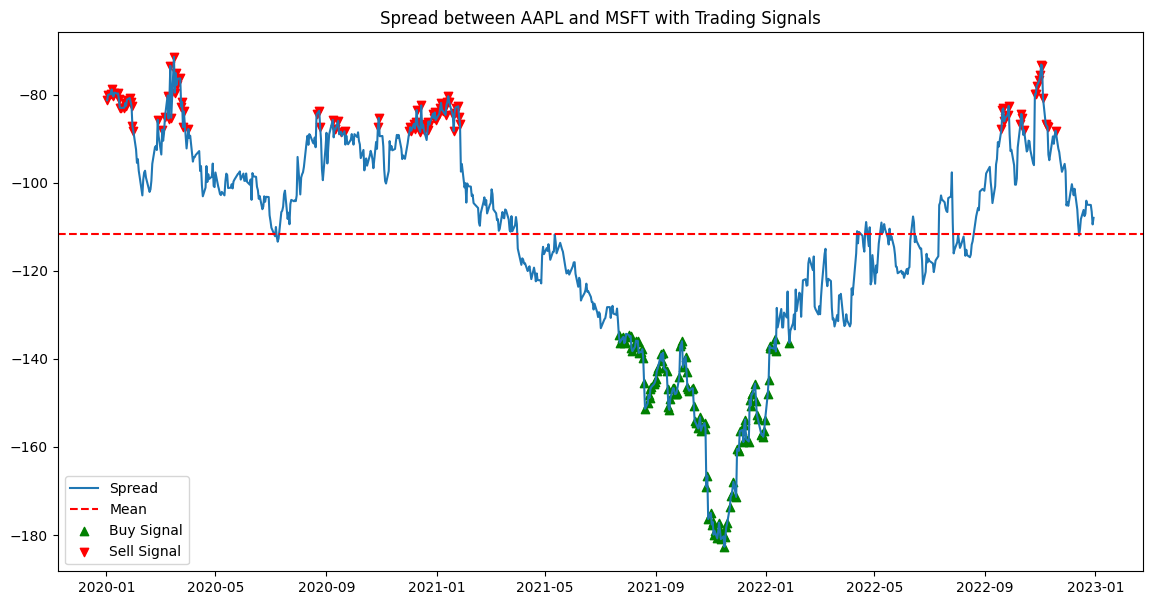

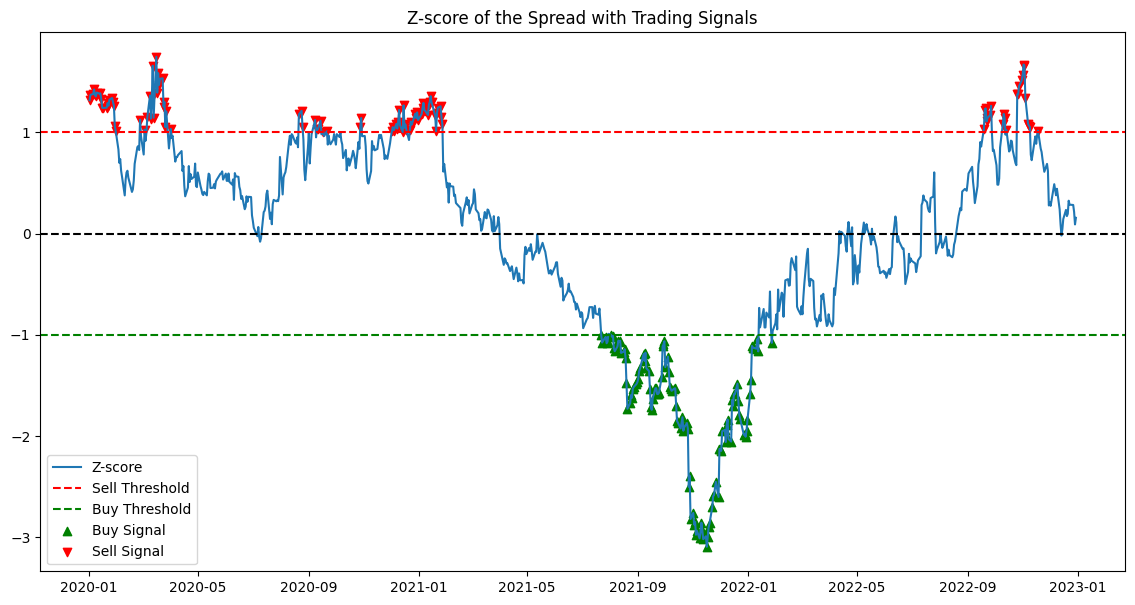

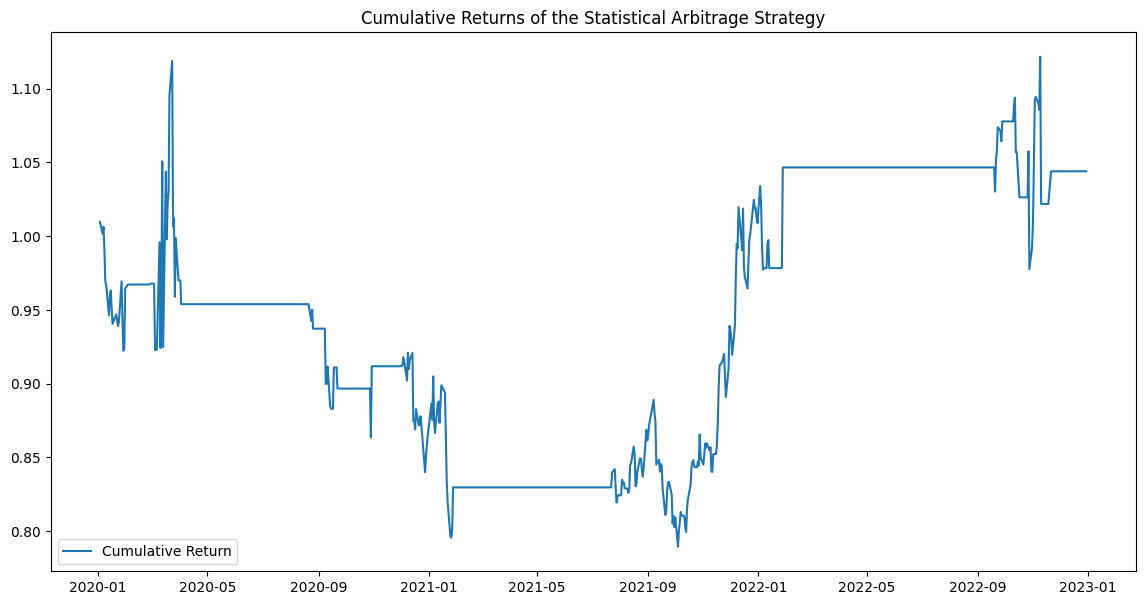

In [2]:
# Calculate the spread
data['Spread'] = data[stock1] - data[stock2]

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Spread between AAPL and MSFT with Trading Signals')
plt.legend()
plt.show()

# Plot the z-score with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-score'], label='Z-score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-1, color='green', linestyle='--', label='Buy Threshold')
plt.scatter(data.index[data['Long'] == 1], data['Z-score'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Z-score'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Z-score of the Spread with Trading Signals')
plt.legend()
plt.show()

# Implement a simple trading strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the daily returns
data['Return'] = data[stock1].pct_change() * data['Position'].shift()

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Statistical Arbitrage Strategy')
plt.legend()
plt.show()
